In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, auc, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split



import sklearn
import ssl
import os
import warnings
warnings.filterwarnings('ignore')


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joselopez/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df=pd.read_csv('./drugsCom_raw/drugsComTrain_raw.tsv', sep='\t',index_col=0 )

In [4]:
df.isna().sum()


drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [5]:
df=df[['review','rating']]

In [6]:
df.sample(5)

,review,rating
27325,"""After taking fenofibrate for 3 months all of ...",10.0
222466,"""I&#039;ve had Kyleena since late June. I had ...",8.0
161936,"""I started experiencing side effects right aft...",1.0
183951,"""My triglycerides have been very high, had the...",10.0
16809,"""I think Copaxone has been great for me, no se...",9.0


In [7]:
df.rating.drop_duplicates().values

array([ 9.,  8.,  5.,  2.,  1., 10.,  4.,  3.,  7.,  6.])

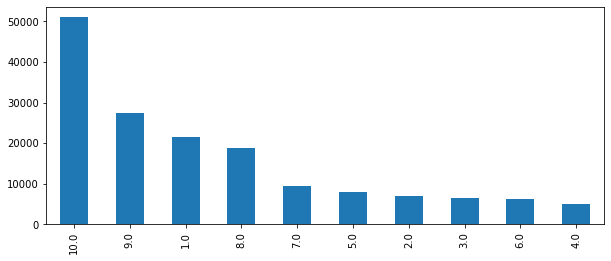

In [8]:
plt.figure(figsize=(10,4))
df.rating.value_counts().plot(kind='bar');

In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^A-Za-z0-9À-ÖØ-öø-ÿ\s]'
    text=re.sub(pattern,'',text)
    text=re.sub(r'\n', '', text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text= remove_special_characters(text)
    text=re.sub(r"(?<=\w)([A-Z])", r" \1", text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [11]:
df.sample(5)

,review,rating
21157,This medication completely ruined my life I ga...,1.0
76955,I have only been on Belviq for less than a wee...,5.0
184879,When I get a sinus infection my Dr prescribes ...,10.0
70676,Almost immediate issues with syncope had to st...,3.0
226651,I was forced given no other choice to get this...,8.0


In [12]:
stop=stopword_list

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [13]:
df['review']=df['review'].apply(remove_stopwords)


In [14]:
df.sample(5)

,review,rating
142732,July 30th 200am unprotected sex someone textin...,10.0
55146,Could last 1 week medication Side effects pret...,4.0
95775,Sertraline helped mood swings unwanted thought...,8.0
140792,incredible pill entirely changed life used sca...,10.0
203769,Ponstel prescribed severe period pain due Fibr...,8.0


In [15]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


In [16]:
df['review']=df['review'].apply(simple_stemmer)
df.sample(3)

,review,rating
50032,intract sever manic depress major depress ever...,10.0
17565,ive ring sever month realli like easi insert s...,9.0
226707,hello current nexplanon birth control say love...,10.0


In [17]:
X=df['review'].values
y=df['rating'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [19]:
X_train.shape, X_test.shape

((129037,), (32260,))

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.336050836949783
              precision    recall  f1-score   support

         1.0       0.67      0.16      0.26      4391
         2.0       0.00      0.00      0.00      1473
         3.0       0.00      0.00      0.00      1300
         4.0       0.00      0.00      0.00      1029
         5.0       0.00      0.00      0.00      1572
         6.0       0.00      0.00      0.00      1362
         7.0       0.00      0.00      0.00      1909
         8.0       0.43      0.00      0.00      3712
         9.0       0.41      0.01      0.03      5420
        10.0       0.32      1.00      0.49     10092

    accuracy                           0.34     32260
   macro avg       0.18      0.12      0.08     32260
weighted avg       0.31      0.34      0.19     32260



In [26]:
df

,review,rating
206461,side effect take combin bystol 5 mg fish oil,9.0
95260,son halfway fourth week intuniv becam concern ...,8.0
92703,use take anoth oral contracept 21 pill cycl ha...,5.0
138000,first time use form birth control im glad went...,8.0
35696,suboxon complet turn life around feel healthie...,9.0
...,...,...
191035,wrote first report mid octob 2014 alcohol sinc...,10.0
127085,given v surgey immedi becam anxiou could sit s...,1.0
187382,limit improv 4 month develop bad rash refus co...,2.0
47128,ive thyroid medic 49 year spent first 38 synth...,10.0


In [28]:
df

,review,rating
206461,side effect take combin bystol 5 mg fish oil,9.0
95260,son halfway fourth week intuniv becam concern ...,8.0
92703,use take anoth oral contracept 21 pill cycl ha...,5.0
138000,first time use form birth control im glad went...,8.0
35696,suboxon complet turn life around feel healthie...,9.0
...,...,...
191035,wrote first report mid octob 2014 alcohol sinc...,10.0
127085,given v surgey immedi becam anxiou could sit s...,1.0
187382,limit improv 4 month develop bad rash refus co...,2.0
47128,ive thyroid medic 49 year spent first 38 synth...,10.0


In [25]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.19306765209213167